## Preparation

In [21]:
# !pip install selenium
# !pip install openpyxl


### Download package

In [4]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import os
import bs4
import requests
import time

### Define Functions

In [5]:
def download_image(url, file_name, num):
    # write image to file
    reponse = requests.get(url)
    if reponse.status_code==200:
        with open(f"{file_name}/{file_name}{num}.jpg", 'wb')  as file:
            file.write(reponse.content)

### Navigate to the location

In [6]:
# Find current location
# If it is not under '# Find current location', Relocate
os.getcwd()

d:\Cool_Project\Biology\Dermatology_LLM


In [7]:
#creating a directory to save images
folder_name = 'images_final'
if not os.path.isdir(folder_name):
    os.makedirs(folder_name)
os.chdir(r"d:\Cool_Project\Biology\Dermatology_LLM\%s"%folder_name)


In [8]:
os.getcwd()

'd:\\Cool_Project\\Biology\\Dermatology_LLM\\images_final'

### Connect to chromedriver

In [26]:
def connect():
    ChromeDriverPath = r'D:\App\chromedriver-win64\chromedriver.exe'
    MyService = Service(ChromeDriverPath)
    driver = webdriver.Chrome(service=MyService)
    return driver  
driver = connect()

## Test

### Search in URL

In [7]:
Target = "Acne"
search_ele = "East Asian's " + Target + " on the face"
search_URL = "https://www.google.com/search?q=%s&source=lnms&tbm=isch"%(search_ele)
driver.get(search_URL)

### Calculate the number of photos

In [8]:
#Scrolling all the way up
driver.execute_script("window.scrollTo(0, 0);")

page_html = driver.page_source
pageSoup = bs4.BeautifulSoup(page_html, 'html.parser')
containers = pageSoup.findAll('div', {'class':"eA0Zlc WghbWd FnEtTd mkpRId m3LIae RLdvSe qyKxnc ivg-i PZPZlf GMCzAd"} )

print(len(containers))

100


### Find Preview image address

Note:

- The `id` name will change each you restart to run the file, but will keep the same if not terminated
- `previewImageXPath` may change
- `previewImageURL` is not a real URL; just a code.

preview URL 

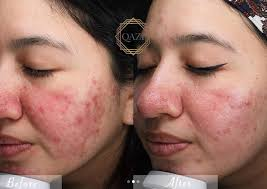

In [9]:
# //*[@id="ixcYae"]/div/div[1]/div/div/div[1]/div[2]
# //*[@id="dimg_yiB7Z-S9MuGA0PEP7q21-Ag_11"]
# # //*[@id="ixcYae"]/div/div[1]/div/div/div[1]/div[2]/h3/a/div/div/div/g-img
# //*[@id="rso"]/div/div/div[1]/div/div/div[1]/div[2]/h3/a/div/div/div
# //*[@id="rso"]/div/div/div[1]/div/div/div[1]/div[2]
# //*[@id="rso"]/div/div/div[1]/div/div/div[1]/div[2]/h3/a/div
# //*[@id="rso"]/div/div/div[1]/div/div/div[1]/div[2]/h3
# //*[@id="rso"]/div/div/div[1]/div/div/div[2]/div[2]/h3
previewImageXPath = """//*[@id="rso"]/div/div/div[1]/div/div/div[1]/div[2]/h3/a/div/div/div"""
# print(previewImageElement)
FirstP = driver.find_element(By.XPATH, previewImageXPath)
# print(FirstP.get_attribute("class"))
SecondP = FirstP.find_element(By.CLASS_NAME,"YQ4gaf")
# print(SecondP)
previewImageURL = SecondP.get_attribute("src")
print("preview URL", previewImageURL)


### Find high-quality image

In [12]:
# //*[@id="rso"]/div/div/div[1]/div/div/div[1]
# //*[@id="rso"]/div/div[1]/div/div/div[1]
# //*[@id="rso"]/div/div/div[1]/div/div/div[1]
container_xpath = """//*[@id="rso"]/div/div/div[1]/div/div/div[1]"""
driver.find_element(By.XPATH,container_xpath).click()
# //*[@id="Sva75c"]/div[2]/div[2]/div/div[2]/c-wiz/div/div[2]/div/a/img[1]
# //*[@id="Sva75c"]/div[2]/div[2]/div/div[2]/c-wiz/div/div[2]/div/a/img[1]
# //*[@id="Sva75c"]/div[2]/div[2]/div/div[2]/c-wiz/div/div[2]/div/a/img[1]
# //*[@id="Sva75c"]/div[2]/div[2]/div/div[2]/c-wiz/div/div[2]/div/a/img[1]
imageElement = driver.find_element(By.XPATH,"""//*[@id="Sva75c"]/div[2]/div[2]/div/div[2]/c-wiz/div/div[2]/div/a/img[1]""")
imageURL= imageElement.get_attribute('src')
print(imageURL)
# //*[@id="Sva75c"]/div[2]/div[2]/div/div[2]/c-wiz/div/div[3]/div[1]/a/img[1]

https://qaziclinic.com/wp-content/uploads/2022/11/active-acne1-small.jpg


## Final Part

### Import dataset

In [10]:
import pandas as pd
import openpyxl

In [11]:
ethnic_df = pd.read_excel(r"D:\Cool_Project\Biology\Dermatology_LLM\Datasets\Ethnic_Origin_Facial_Issues.xlsx")
issue_df  = pd.read_csv(r"D:\Cool_Project\Biology\Dermatology_LLM\Datasets\dermatology_conditions.csv")

In [12]:
# Add a constant key and perform a cross join
ethnic_df['key'] = 1
issue_df['key'] = 1
cross_joined_df = pd.merge(issue_df,ethnic_df, on='key').drop('key', axis=1)

In [13]:
df = cross_joined_df[["Ethnic Origin","Condition"]]
print("There are {} groups needed data".format(df["Condition"].count()))

There are 70 groups needed data


In [14]:
df = df.copy()
df.loc[:, 'search_kw'] = df['Ethnic Origin'] + "'s " + df['Condition'] + " on the face"

### Iteration to get the whole fold

#### Test

In [131]:
# # //*[@id="rso"]/div/div/div[1]/div/div/div[1]
# container_xpath = """//*[@id="rso"]//div/div/div[1]/div/div/div[%s]"""%(104)
# element = driver.find_element(By.XPATH,container_xpath)
# driver.execute_script("arguments[0].scrollIntoView(false);", element)
# # driver.execute_script("arguments[0].scrollIntoView(false);", element)
# element.click()
# # //*[@id="rso"]/div/div/div[1]/div/div/div[1]
# # //*[@id="rso"]/div/div/div[1]/div/div/div[3]

In [106]:
# # check_class = driver.find_element(By.CLASS_NAME, "eA0Zlc WghbWd FnEtTd mkpRId m3LIae RLdvSe qyKxnc ivg-i PZPZlf GMCzAd")
# element.get_attribute("class")

'eA0Zlc WghbWd FnEtTd mkpRId m3LIae RLdvSe qyKxnc ivg-i PZPZlf GMCzAd'

In [141]:
# # FirstP = driver.find_element(By.XPATH, previewImageXPath)
# previewImageXPath
# # //*[@id="rso"]/div/div/div[1]/div/div/div[6]/div[2]/h3
# # //*[@id="rso"]/div/div/div[1]/div/div/div[6]/div[2]
# # //*[@id="rso"]/div/div/div[1]/div/div/div[6]/div[2]/h3/a

'//*[@id="rso"]/div/div/div[1]/div/div/div[7]/div[2]/h3/a'

In [69]:
df[df["Condition"]=="Hyperpigmentation"]

,Ethnic Origin,Condition,search_kw
14,Caucasian,Hyperpigmentation,Caucasian's Hyperpigmentation on the face
15,East Asian,Hyperpigmentation,East Asian's Hyperpigmentation on the face
16,South Asian,Hyperpigmentation,South Asian's Hyperpigmentation on the face
17,African,Hyperpigmentation,African's Hyperpigmentation on the face
18,Middle Eastern,Hyperpigmentation,Middle Eastern's Hyperpigmentation on the face
19,Latino/Hispanic,Hyperpigmentation,Latino/Hispanic's Hyperpigmentation on the face
20,Indigenous/Native American,Hyperpigmentation,Indigenous/Native American's Hyperpigmentation...


#### Real Part

In [15]:
from selenium.common.exceptions import NoSuchElementException
def image_set(current_index, Target,expect_image=100):
    i = 1
    j = 1
    while i<=expect_image:
        # The id maybe something you need to change
        container_xpath = """//*[@id="rso"]//div/div/div[1]/div/div/div[%s]"""%(j)
        # previewImageXPath = """//*[@id="rso"]/div/div/div[1]/div/div/div[%s]/div[2]/h3/a"""%(j)
        # # previewImageXPath = """//*[@id="rso"]/div/div/div[1]/div/div/div[1]/div[%s]/h3/a/div/div/div"""%(j)
        # FirstP = driver.find_element(By.XPATH, previewImageXPath)
        # SecondP = FirstP.find_element(By.CLASS_NAME,"YQ4gaf")
        # previewImageURL = SecondP.get_attribute("src")
        element = driver.find_element(By.XPATH,container_xpath)
        checkclass = element.get_attribute("class")
        j+=1
        if checkclass == 'eA0Zlc WghbWd FnEtTd mkpRId m3LIae RLdvSe qyKxnc ivg-i PZPZlf GMCzAd':
            driver.execute_script("arguments[0].scrollIntoView({block: 'center'});", element)
            # last_height = driver.execute_script("return document.body.scrollHeight")
            try:
                element.click()
            except:
                try:
                    time.sleep(3)
                    e = driver.find_element(By.XPATH,"""//*[@id="rso"]/div/div/div[2]/div[2]/div[4]/div[2]/a""")
                    e.click()
                    time.sleep(10)
                    continue
                except:
                    print("There are no extra image")
                    return current_index
            try:
                imageElement = driver.find_element(By.XPATH, """//*[@id="Sva75c"]/div[2]/div[2]/div/div[2]/c-wiz/div/div[3]/div[1]/a/img[1]""")
            except NoSuchElementException:
                try:
            # 第二种可能的路径
                    imageElement = driver.find_element(By.XPATH, """//*[@id="Sva75c"]/div[2]/div[2]/div/div[2]/c-wiz/div/div[2]/div/a/img[1]""")
                except NoSuchElementException:
                    try:
            # 第三种可能的路径
                        imageElement = driver.find_element(By.XPATH, """//*[@id="Sva75c"]/div[2]/div[2]/div/div[2]/c-wiz/div/div[2]/div/a/img[1]""")
                    except NoSuchElementException:
                        print("Image element not found in all XPaths.")
                        continue
            imageURL = imageElement.get_attribute('src')

            timeStarted = time.time()
            while True:

                # imageElement = driver.find_element(By.XPATH,"""//*[@id="Sva75c"]/div[2]/div[2]/div/div[2]/c-wiz/div/div[3]/div[1]/a/img[1]""")
                # imageURL= imageElement.get_attribute('src')

                if imageURL.startswith("http:") or imageURL.startswith("https:"):
                    #print("actual URL", imageURL)
                
                    break

                else:
                    #making a timeout if the full res image can't be loaded
                    currentTime = time.time()

                    if currentTime - timeStarted > 10:
                        print("Timeout! Will download a lower resolution image and move onto the next one")
                        break

            if not os.path.exists(Target):
                os.makedirs(Target)                
            #Downloading image
            try:
                download_image(imageURL, Target, current_index)
                print("Downloaded element %s out of %s total. URL: %s" % (i,expect_image, imageURL))
                current_index+=1
                i+=1
            except:
                print("Couldn't download an image %s, continuing downloading the next one"%(i))
        if j>=1500:
            return j
    return current_index


In [22]:
Exe_index = []

In [23]:
# Exe_index = [i for i in range(54)]    

In [24]:
Exe_index

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53]

In [14]:
df[df["Condition"]=="Seborrheic Dermatitis"]

,Ethnic Origin,Condition,search_kw
49,Caucasian,Seborrheic Dermatitis,Caucasian's Seborrheic Dermatitis on the face
50,East Asian,Seborrheic Dermatitis,East Asian's Seborrheic Dermatitis on the face
51,South Asian,Seborrheic Dermatitis,South Asian's Seborrheic Dermatitis on the face
52,African,Seborrheic Dermatitis,African's Seborrheic Dermatitis on the face
53,Middle Eastern,Seborrheic Dermatitis,Middle Eastern's Seborrheic Dermatitis on the ...
54,Latino/Hispanic,Seborrheic Dermatitis,Latino/Hispanic's Seborrheic Dermatitis on the...
55,Indigenous/Native American,Seborrheic Dermatitis,Indigenous/Native American's Seborrheic Dermat...


In [27]:
return_n = 600 # Put current image index
for index, row in df.iterrows():
    if index not in Exe_index:
        mod = index%7
        if mod == 0:
            return_n = 1
            driver.quit()
            driver = connect()
        # search_query = row['search_kw']
        # url = f"https://www.google.com/search?hl=en&tbm=isch&q={search_query}"
        Target = row['Condition']
        search_ele = row['search_kw']
        search_URL = "https://www.google.com/search?q=%s&source=lnms&tbm=isch"%(search_ele)
        driver.get(search_URL)

        #Scrolling all the way up
        driver.execute_script("window.scrollTo(0, 0);")

        page_html = driver.page_source
        pageSoup = bs4.BeautifulSoup(page_html, 'html.parser')
        containers = pageSoup.findAll('div', {'class':"eA0Zlc WghbWd FnEtTd mkpRId m3LIae RLdvSe qyKxnc ivg-i PZPZlf GMCzAd"} )
        leastimage = len(containers)
        print("There are at least %d images for %s"%(len(containers),search_ele))
        origin_n = return_n
        return_n = image_set(return_n,Target,leastimage)
        if return_n < 1500:
            print("%d has been download"%return_n)
            Exe_index.append(index)
        else:
            return_n = origin_n
            print("%s has failed"%(search_ele))
    
    

There are at least 100 images for Latino/Hispanic's Seborrheic Dermatitis on the face
Downloaded element 1 out of 100 total. URL: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQTqyzqyrLaJA3CGu3NxQW8ORNQVl8fjC-QIw&s
Downloaded element 2 out of 100 total. URL: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQvs2dMDX04pCGM7FvfKYu-X4wyFtPdVTBU4A&s
Downloaded element 3 out of 100 total. URL: https://www.jaad.org/cms/10.1016/j.jaad.2022.12.017/asset/ebf992af-3fb8-45cd-8055-8dd6db266ef3/main.assets/gr2_lrg.jpg
Downloaded element 4 out of 100 total. URL: https://www.researchgate.net/publication/365914164/figure/fig4/AS:11431281160841475@1684893226883/Seborrheic-dermatitis-in-Black-and-White-patients-There-is-yellow-greasy-scale-present_Q320.jpg
Downloaded element 5 out of 100 total. URL: https://www.dermatologyadvisor.com/wp-content/uploads/sites/20/2019/01/basalcellcarcinomahispanic_1379439.jpg
Downloaded element 6 out of 100 total. URL: https://encrypted-tbn0.gstatic.com/images